# End-to-End 머신러닝 프로젝트

부동산 회사에 막 고용된 데이터 과학자라고 가정하고 예제 프로젝트를 처음부터 끝까지 (End-to-Enf) 진행하겠습니다. 주요 단계는 다음과 같습니다

1. 큰 그림을 봅니다 (**look at the big picture**).
2. 데이터를 구합니다 (**get the data**).
3. 데이터로부터 통찰을 얻기 위해 탐색하고 시각화합니다 (**discover and visualize the data to gain insights**).
4. 머신러닝 알고리즘을 위해 데이터를 준비합니다 (**prepare the data for Machine Learning algorithms**).
5. 모델을 선택하고 훈련시킵니다 (**select a model and train it**).
6. 모델을 상세하게 조정합니다 (**fine-tune your model**).
7. 솔루션을 제시합니다 (**present your solution**).
8. 시스템을 론칭하고 모니터링하고 유지 보수합니다 (**launch, monitor, and maintain your system**).

이 예제 프로젝트를 위해서 **캘리포니아 주택 가격 데이터셋**을 사용합니다. 이 데이터셋은 1990년 캘리포니아 인구조사 데이터를 기반으로 합니다.

<div>
<img src="images/fig2-1.png" width="500"/>
</div>

## 1. 큰 그림 보기 (Look at the Big Picture)

풀어야 할 문제: 캘리포니아 인구조사 데이터를 사용해 캘리포니아의 주택 가격 모델을 만드는 것

**이 모델이 전체 시스템 안에서 어떻게 사용될 지를 이해하는 것**이 중요합니다.

<div>
<img src="images/fig2-2.png" width="500"/>
</div>

중요한 질문: 현재 솔루션은? 전문가가 수동으로? 복잡한 규칙? 머신러닝?

### 문제 정의
- **지도학습(supervised learning)**, **비지도학습(unsupervised learning)**, **강화학습(reinforcement learning)** 중에 어떤 경우에 해당하는가?
   > label이 있는 데이터니까 지도학습   
   
- **분류문제(classification)**인가 아니면 **회귀문제(regresssion)** 인가?   
   > 집값은 연속적인 데이터니까 회귀문제
   
- **배치학습(batch learning)**, **온라인 학습(online learning)** 중 어떤 것을 사용해야 하는가?
   > 연속적인 흐름이 있진 않으니까 (1년에 1번식 인구조사하니까) 배치학습에 가깝다.

### 성능측정지표(performance measure) 선택

평균제곱근 오차(root mean square error (RMSE)) ✨

$\mathrm{RMSE}(\mathbf{X}, h) = \sqrt{\frac{1}{m}\sum_{i=1}^{m}\left(h\left(\mathbf{x}^{(i)}\right)-y^{(i)}\right)^2}$

- $m$: 데이터셋에 있는 샘플 수
- $\mathbf{x}^{(i)}$: $i$번째 샘플의 전체 특성값의 벡터(vector)
- $y^{(i)}$: $i$번째 샘플의 label(해당 샘플의 기대 출력값)
\begin{align*}
\mathbf{x}^{(1)} = \begin{bmatrix}
           -118.29 \\
           33.91 \\
           1,416 \\
           38,372
\end{bmatrix}
\end{align*}

$$y^{(1)} = 156,400$$
- $\mathbf{X}$: 데이터셋 모든 샘플의 모든 특성값(features)을 포함하는 행렬(matrix)
\begin{align*}
\mathbf{X} = \begin{bmatrix}
           \left(\mathbf{x}^{(1)}\right)^T \\
           \left(\mathbf{x}^{(2)}\right)^T \\
           \vdots \\
           \left(\mathbf{x}^{(2000)}\right)^T
           \end{bmatrix}
           = \begin{bmatrix}
           -188.29 & 33.91 & 1,416 & 38,372 \\
           \vdots & \vdots & \vdots & \vdots
           \end{bmatrix}
\end{align*}

- $h$: 예측함수(prediction function). 하나의 샘플 $\mathbf{x}^{(i)}$에 대해 예측값 $\hat{y}^{(i)} = h\left(\mathbf{x}^{(i)}\right)$를 출력함.
- $\mathrm{RMSE}(\mathbf{X}, h)$: 모델 $h$가 얼마나 좋은지 평가하는 지표, 또는 비용함수(cost function)

## 2. 데이터 가져오기 (Get the Data)

- 작업환경 설정

```
$ export ML_PATH="$HOME/ml" # You can change the path if you prefer
$ mkdir -p $ML_PATH

$ python3 -m pip --version
pip 19.3.1 from [...]/lib/python3.7/site-packages/pip (python 3.7)

$ python3 -m pip install --user -U pip
Collecting pip
[...]
Successfully installed pip-19.3.1
```

- 독립적인 환경(isolated environment) 만들기 

```
$ python3 -m pip install --user -U virtualenv
Collecting virtualenv
[...]
Successfully installed virtualenv-16.7.6

$ cd $ML_PATH
$ python3 -m virtualenv my_env
Using base prefix '[...]'
New python executable in [...]/ml/my_env/bin/python3
Also creating executable in [...]/ml/my_env/

$ cd $ML_PATH
$ source my_env/bin/activate # on Linux or macOS
$ .\my_env\Scripts\activate # on Windows
```

- 필요한 패키지들 설치하기

```
$ python3 -m pip install -U jupyter matplotlib numpy pandas scipy scikit-learn
Collecting jupyter
Downloading https://[...]/jupyter-1.0.0-py2.py3-none-any.whl
Collecting matplotlib
[...]
```

- 커널을 Jupyter에 등록하고 이름 정하기
```
$ python3 -m ipykernel install --user --name=python3
```

- Jupyter 실행
```
$ jupyter notebook
[...] Serving notebooks from local directory: [...]/ml
[...] The Jupyter Notebook is running at:
[...] http://localhost:8888/?token=60995e108e44ac8d8865a[...]
[...] or http://127.0.0.1:8889/?token=60995e108e44ac8d8865a[...]
[...] Use Control-C to stop this server and shut down all kernels [...]
```


### 데이터 다운로드

+ 기본적인 set up

In [19]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [20]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data를 호출하면 현재 작업공간에 datasets/housing 디렉토리를 만들고 housing.tgz 파일을 내려받고 압축을 풀어 housing.csv 파일을 만듭니다.

In [21]:
fetch_housing_data()

In [22]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

### 데이터 구조 훑어보기

In [23]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [24]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


ocean_proximity: 범주형(categorical) 필드

In [25]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

describe(): 숫자형 특성의 정보를 요약

In [26]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


히스토그램으로 데이터 분석해보기

+ 데이터를 만든 이(팀)에게 데이터 문의해서 데이터의 속성을 잘 파악해야함 !
   + 마지막 값이 몰려있다 (housing_meadian_age, median_house_value 의 경우 마지막 값에 많이 몰려있음 : 이는 해당 값보다 큰 값에 대해 동일하게 처리한 것 )
   + meadian_income의 경우, x축의 값(incomed)의 단위가 이상한데 이는 10,000 불의 단위가 나뉘어진 것

Saving figure attribute_histogram_plots


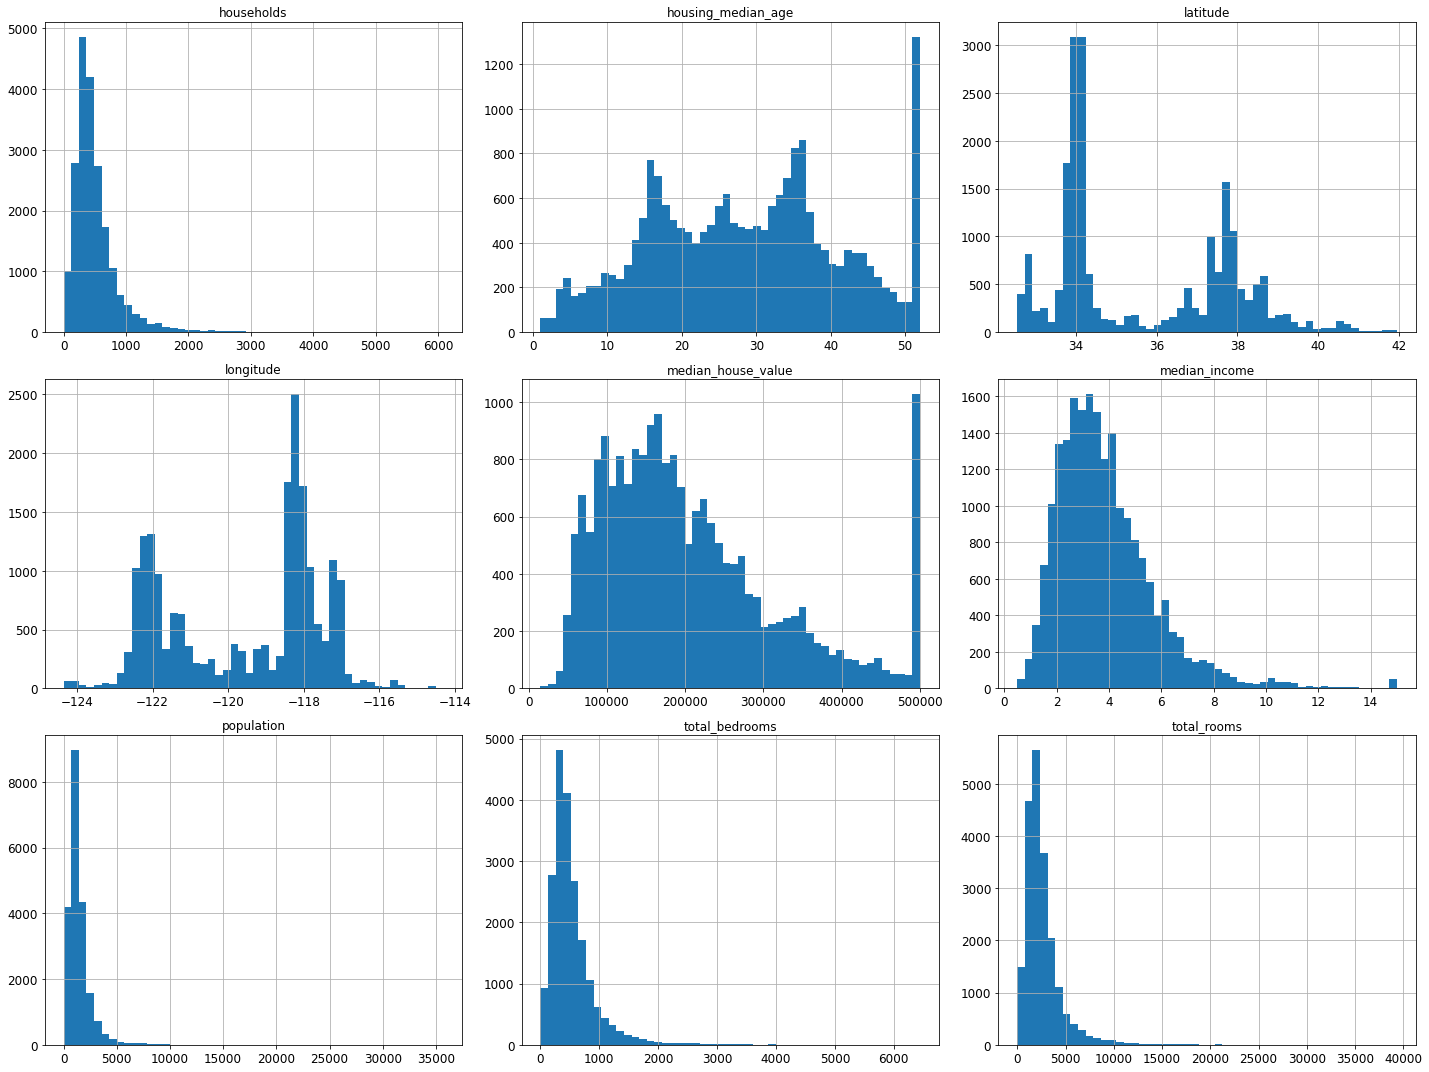

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

### 테스트 데이터셋 만들기

좋은 모델을 만들기 위해선 훈련에 사용되지 않고 **모델평가만을 위해서 사용될 "테스트 데이터셋"을 따로 구분하는 것이 필요**합니다. 
> 보통 20% 정도를 사용  

>만약 데이터가 충분히 있다면 적은 비율의 데이터를 테스트 데이터로 사용

테스트 데이터셋을 별도로 생성할 수도 있지만 **프로젝트 초기의 경우 하나의 데이터셋을 훈련, 테스트용으로 분리하는 것이 일반적**입니다.

In [28]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [29]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [30]:
a = np.random.permutation(10)
a

array([8, 1, 5, 0, 7, 2, 9, 4, 3, 6])

In [32]:
train_set, test_set = split_train_test(housing, 0.2) # train/test data split
len(train_set), len(test_set)

(16512, 4128)

- 위 방법은 문제점은?
- 해결방안: 각 샘플의 식별자(identifier)를 사용해서 분할

In [33]:
from zlib import crc32

# test set에 속하냐
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

인덱스를 id로 추가하기

In [34]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [35]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [36]:
housing_with_id.head() # index column 추가한 data

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


- 위 방법의 문제점은?
- Id를 만드는 데 **안전한 feature들**을 사용해야 함

In [37]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [38]:
train_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15


In [39]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20


Scikit-Learn에서 **기본적으로 제공되는 데이터분할 함수** : ```train_test_split```

In [40]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

#### 계층적 샘플링(stratified sampling)
- 전체 데이터를 계층(strata)라는 동질의 그룹으로 나누고, 테스트 데이터가 전체 데이터를 잘 대표하도록 각 계층에서 올바른 수의 샘플을 추출

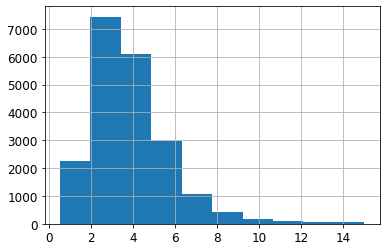

In [41]:
housing["median_income"].hist()

In [42]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5]) #bins 적절하게 나눠야함

In [45]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

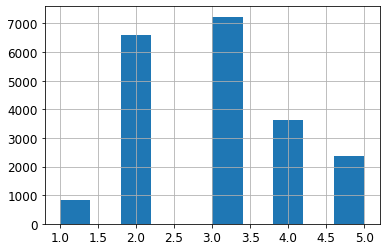

In [44]:
housing["income_cat"].hist()

In [46]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [47]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16354 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   median_house_value  16512 non-null  float64 
 9   ocean_proximity     16512 non-null  object  
 10  income_cat          16512 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.4+ MB


In [48]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 5241 to 2398
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           4128 non-null   float64 
 1   latitude            4128 non-null   float64 
 2   housing_median_age  4128 non-null   float64 
 3   total_rooms         4128 non-null   float64 
 4   total_bedrooms      4079 non-null   float64 
 5   population          4128 non-null   float64 
 6   households          4128 non-null   float64 
 7   median_income       4128 non-null   float64 
 8   median_house_value  4128 non-null   float64 
 9   ocean_proximity     4128 non-null   object  
 10  income_cat          4128 non-null   category
dtypes: category(1), float64(9), object(1)
memory usage: 359.0+ KB


In [50]:
housing["income_cat"].value_counts() / len(housing)
# 전체 데이터셋의 비율

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [52]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)
# test data set의 비율 : 전체 데이터 셋 비율과 거의 동일

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [53]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [54]:
compare_props # Random하게 나눈거랑 Stratified으로 나눈거랑 얼마나 차이가 있나
# 계층적 샘플링한 것이 error가 낮음

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


In [55]:
# 원래 상태로 되돌림
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

### 데이터 이해를 위한 탐색과 시각화

In [56]:
# 데이터 복사본 만들기 (훈련데이터를 손상시키지 않기 위해)
housing = strat_train_set.copy()

#### 지리적 데이터 시각화

Saving figure bad_visualization_plot


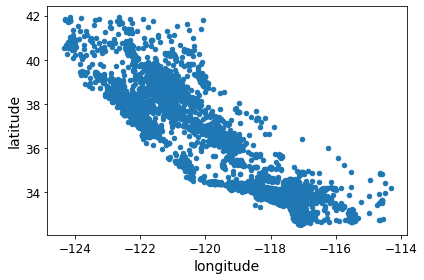

In [57]:
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

#### 밀집된 영역 표시

- alpha옵션

Saving figure better_visualization_plot


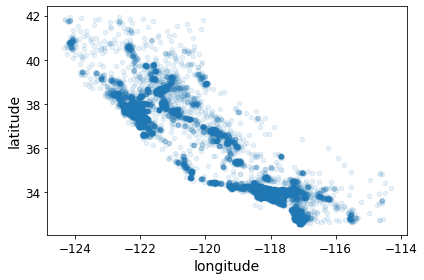

In [58]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

#### 더 다양한 정보 표시

- s: 원의 반지름 => 인구
- c: 색상 => 가격

Saving figure housing_prices_scatterplot


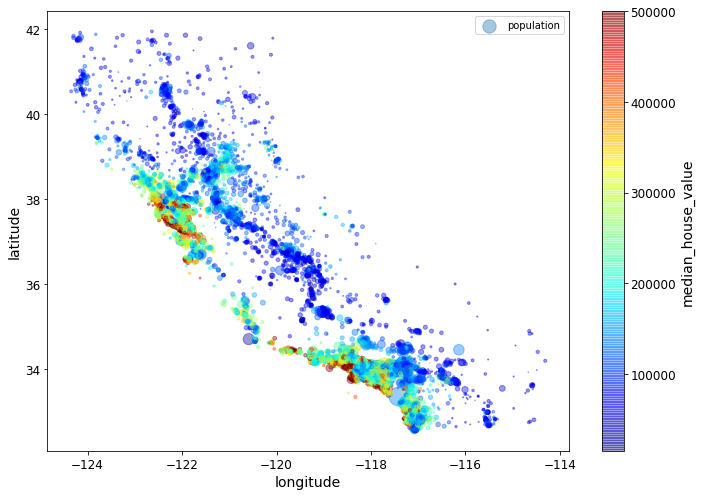

In [59]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

In [62]:
# Download the California image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png" # 지도 그림 x

Saving figure california_housing_prices_plot


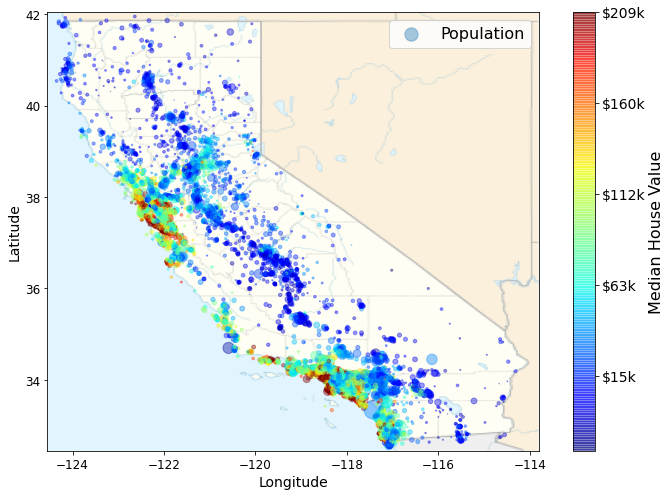

In [71]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

위에서 관찰할 수 있는 사실은(주택가격이 높은 지역)?

#### 상관관계(Correlations) 관찰하기

In [72]:
corr_matrix = housing.corr()

In [73]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

<div>
<img src="images/fig2-14.png" width="800"/>
</div>

#### scatter_matrix 사용해서 상관관계 확인하기

Saving figure scatter_matrix_plot


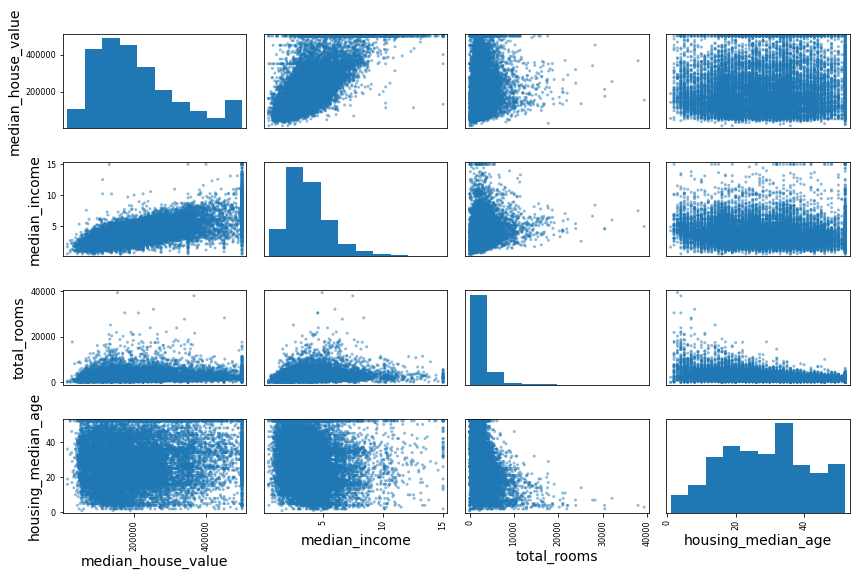

In [74]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

# 특성 몇 개만 살펴봄 
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure income_vs_house_value_scatterplot


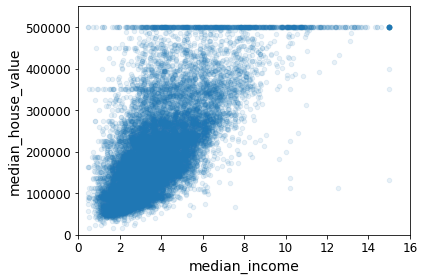

In [75]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

위에서 관찰할 수 있는 사실들?

+ 50만불에 해당하는 값에 대해 선처럼 나타남, 또한 중간에 희미한 선 존재 
> 비정상처럼 보이는 데이터들은 가능하면 train data set에서 제거해주는 것이 모델학습에 도움이 됨

#### 특성 조합들 실험

- 여러 특성(feature, attribute)들의 조합으로 새로운 특성을 정의해볼 수 있음
- 예를 들자면, **가구당 방 개수**, **침대방(bedroom)의 비율**, **가구당 인원**

In [76]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [77]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

위에서 관찰할 수 있는 사실들?
- bedrooms_per_room : 강한 음의 상관관계를 가짐  
- rooms_per_household : 2번째로 높은 상관계수를 가짐

> 새로 만든 feature가 집이 얼마나 큰지 간접적으로 드러냄

데이터 탐색과정은 대부분 한 번으로 끝나지 않고 모델을 만들고 문제점을 분석한 뒤 다시 실행하게 됩니다.

### 머신러닝 알고리즘을 위한 데이터 준비

데이터 준비는 데이터 변환(data transformation)과정으로 볼 수 있습니다.

데이터 수동변환 vs. 자동변환(함수만들기)

데이터 자동변환의 장점들
- 새로운 데이터에 대한 변환을 손쉽게 재생산(reproduce)할 수 있습니다.
- 향후에 재사용(reuse)할 수 있는 라이브러리를 구축하게 됩니다.
- 실제 시스템에서 가공되지 않은 데이터(raw data)를 알고리즘에 쉽게 입력으로 사용할 수 있도록 해줍니다.
- 여러 데이터 변환 방법을 쉽게 시도해 볼 수 있습니다.

In [78]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

### 데이터 정제(Data Cleaning)

누락된 값(missing values) 다루는 방법들 

- 해당 구역을 제거(행을 제거)
- 해당 특성을 제거(열을 제거)
- 어떤 값으로 채움(0, 평균, 중간값 등)

In [79]:
housing.isnull().any(axis=1)

17606    False
18632    False
14650    False
3230     False
3555     False
         ...  
6563     False
12053    False
13908    False
11159    False
15775    False
Length: 16512, dtype: bool

In [80]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head() # True if there is a null feature
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [81]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [82]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


In [83]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3

In [84]:
median

433.0

In [85]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


SimpleImputer 사용하기

In [86]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median") # 데이터가 없는경우 median으로 채워넣음

In [87]:
# 중간값은 수치형 특성에서만 계산될 수 있기 때문에 텍스트 특성을 제외한 복사본을 생성
housing_num = housing.drop("ocean_proximity", axis=1)

In [88]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [89]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [90]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

이제 학습된 imputer 객체를 사용해 누락된 값을 중간값으로 바꿀 수 있습니다.

In [91]:
X = imputer.transform(housing_num)

In [92]:
X

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

위 X는 NumPy array입니다. 이를 다시 pandas DataFrame으로 되돌릴 수 있습니다.

In [93]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

제대로 채워져 있는지 확인해봅니다.

In [94]:
sample_incomplete_rows.index.values

array([ 4629,  6068, 17923, 13656, 19252], dtype=int64)

In [95]:
housing_num.loc[sample_incomplete_rows.index.values] # MA를 가진 데이터

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662


In [98]:
housing_tr.loc[sample_incomplete_rows.index.values] # imputer를 통해 MA를 채워넣음

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662


###  Estimator, Transformer, Predictor

- **추정기(estimator)**: 데이터셋을 기반으로 모델 파라미터들을 추정하는 객체를 추정기라고 합니다(예를 들자면 imputer). 추정자체는 fit() method에 의해서 수행되고 하나의 데이터셋을 매개변수로 전달받습니다(지도학습의 경우 label을 담고 있는 데이터셋을 추가적인 매개변수로 전달).


- **변환기(transformer)**: (imputer같이) 데이터셋을 변환하는 추정기를 변환기라고 합니다. 변환은 transform() method가 수행합니다. 그리고 변환된 데이터셋을 반환합니다.


- **예측기(predictor)**: 일부 추정기는 주어진 새로운 데이터셋에 대해 예측값을 생성할 수 있습니다. 앞에서 사용했던 LinearRegression도 예측기입니다. 예측기의 predict() method는 새로운 데이터셋을 받아 예측값을 반환합니다. 그리고 score() method는 예측값에 대한 평가지표를 반환합니다.

### 텍스트와 범주형 특성 다루기

In [99]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [100]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [101]:
ordinal_encoder.categories_ # class 값 배정

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

이 표현방식의 문제점?

- "특성의 값이 비슷할수록 두 개의 샘플이 비슷하다"가 성립할 때 모델학습이 쉬워짐
> 특성의 값 순서가 바다에 가까운 정도를 보장하지 않음.


One-hot encoding

In [102]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

위 출력을 보면 일반적인 배열이 아니고 "sparse matrix"임을 알 수 있습니다.

In [103]:
housing_cat_1hot.toarray() # class에 해당하는 값이 1

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [106]:
cat_encoder = OneHotEncoder(sparse=False) # sparse 옵션 설정에 따라 arr/sapse matix 출력
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [107]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### 나만의 변환기(Custom Transformers) 만들기

Scikit-Learn이 유용한 변환기를 많이 제공하지만 프로젝트를 위해 특별한 데이터 처리 작업을 해야 할 경우가 많습니다. 이 때 나만의 변환기를 만들 수 있습니다.

반드시 구현해야 할 method들
- **fit()**
- **transform()**

아래의 custom tranformer는 rooms_per_household, population_per_household 두 개의 새로운 특성을 데이터셋에 추가하며 add_bedrooms_per_room = True로 주어지면 bedrooms_per_room 특성까지 추가합니다. add_bedrooms_per_room은 하이퍼파라미터.

In [108]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    # X : arr(np)
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            # concatenate
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

Numpy데이터를 DataFrame으로 변환

In [109]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


### 특성 스케일링(Feature Scaling)

- **Min-max scaling**: 0과 1사이의 값이 되도록 조정
- **표준화(standardization)**: 평균이 0, 분산이 1이 되도록 만들어 줌(사이킷런의 StandardScaler사용)

### 변환 파이프라인(Transformation Pipelines)

여러 개의 변환이 순차적으로 이루어져야 할 경우 Pipeline class를 사용하면 편합니다.

In [110]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

이름, 추정기 쌍의 목록

마지막 단계를 제외하고 모두 변환기여야 합니다(fit_transform() method를 가지고 있어야 함).

파이프라인의 fit() method를 호출하면 모든 변환기의 fit_transform() method를 순서대로 호출하면서 한 단계의 출력을 다음 단계의 입력으로 전달합니다. 마지막 단계에서는 fit() method만 호출합니다.

In [112]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

각 열(column) 마다 다른 파이프라인을 적용할 수도 있습니다!   

예를 들어 **수치형 특성들과 범주형 특성들에 대해 별도의 변환**이 필요하다면 아래와 같이 **ColumnTransformer**를 사용하면 됩니다.

In [113]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [114]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [115]:
housing_prepared.shape, housing.shape

((16512, 16), (16512, 9))

### 모델 훈련(Train a Model)

드디어 모델을 훈련시킬 준비가 되었습니다!   

지난 시간에 배웠던 선형회귀모델(linear regression)을 사용해보겠습니다.

In [116]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

모델훈련은 딱 3줄의 코드면 충분합니다!

몇 개의 샘플에 모델을 적용해서 예측값을 확인해보고 실제값과 비교해보겠습니다.

In [117]:
lin_reg.coef_

array([-55650.4116403 , -56716.45236929,  13732.83841856,  -1933.1277138 ,
         7330.04062103, -45708.26306673,  45455.47519691,  74714.39134154,
         6605.12802802,   1042.95709453,   9249.75886697, -18016.52432168,
       -55219.15208555, 110357.78363967, -22479.84008184, -14642.2671506 ])

In [118]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(lin_reg.coef_, attributes), reverse=True)

[(110357.78363966991, 'ISLAND'),
 (74714.39134153843, 'median_income'),
 (45455.47519691441, 'households'),
 (13732.83841855541, 'housing_median_age'),
 (9249.75886697368, 'bedrooms_per_room'),
 (7330.040621029702, 'total_bedrooms'),
 (6605.128028015065, 'rooms_per_hhold'),
 (1042.9570945281878, 'pop_per_hhold'),
 (-1933.127713800795, 'total_rooms'),
 (-14642.267150598302, 'NEAR OCEAN'),
 (-18016.52432168299, '<1H OCEAN'),
 (-22479.840081835082, 'NEAR BAY'),
 (-45708.263066728214, 'population'),
 (-55219.15208555335, 'INLAND'),
 (-55650.41164030249, 'longitude'),
 (-56716.45236929203, 'latitude')]

In [119]:
# 몇 개의 샘플에 대해 데이터변환 및 예측을 해보자
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared).round(decimals=1))

Predictions: [210644.6 317768.8 210956.4  59219.  189747.6]


In [120]:
print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


전체 훈련 데이터셋에 대한 RMSE를 측정해보겠습니다.

In [121]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

훈련 데이터셋의 RMSE가 이 경우처럼 큰 경우 => **과소적합(under-fitting)**

과소적합이 일어나는 이유?
- 특성들(features)이 충분한 정보를 제공하지 못함
- 모델이 충분히 강력하지 못함

강력한 비선형모델인 DecisionTreeRegressor를 사용해보겠습니다.


<div>
<img src="images/decision_tree.png" width="400"/>
</div>

In [122]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels) # 학습

DecisionTreeRegressor(random_state=42)

In [123]:
housing_predictions = tree_reg.predict(housing_prepared) # 예측
tree_mse = mean_squared_error(housing_labels, housing_predictions) # RMSE
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

이 모델이 선형모델보다 낫다고 말할 수 있을까요? 어떻게 알 수 있을까요?

- 테스트 데이터셋을 이용한 검증 
  > 이런식으로 하면, 테스트 데이터셋을 들여다보게 되고 학습하는 과정에 영향을 미침. 또다른 테스트 데이터셋에 대해서 좋지 못한 결과가 나올 가능성이 높아지게 됨
  
- 훈련 데이터셋의 일부를 **검증데이터(validation data)셋으로 분리해서 검증** 
- **k-겹 교차 검증(k-fold cross-validation)** 

### 교차 검증(Cross-Validation)을 사용한 평가

<div>
<img src="images/kfolds.png" width="500"/>
</div>

**결정트리 모델**에 대한 평가

In [125]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [126]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
Mean: 71407.68766037929
Standard deviation: 2439.4345041191004


**선형회귀모델**에 대한 평가

In [127]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.6740017983425


**RandomForestRegressor**에 대한 평가


<div>
<img src="images/random_forest.png" width="500"/>
</div>

In [129]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42) # n_estimators=#tree
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [130]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18603.515021376355

In [131]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [49519.80364233 47461.9115823  50029.02762854 52325.28068953
 49308.39426421 53446.37892622 48634.8036574  47585.73832311
 53490.10699751 50021.5852922 ]
Mean: 50182.303100336096
Standard deviation: 2097.0810550985693


Random forest 모델이 가장 좋은 결과를 보임 (모델 선택)

모델 선택 후, 세부적으로 튜닝 진행

### 모델 세부 튜닝(Fine-Tune Your Model)

모델의 종류를 선택한 후에 모델을 세부 튜닝하는 것이 필요합니다. 모델 학습을 위한 **최적의 하이퍼파라미터를 찾는 과정**이라고 말할 수 있습니다.

#### 그리드 참색(Grid Search)

수동으로 하이퍼파라미터 조합을 시도하는 대신 **GridSearchCV**를 사용하는 것이 좋습니다.

In [132]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [133]:
grid_search.best_params_ # 가장 좋은 파라미터

{'max_features': 8, 'n_estimators': 30}

In [134]:
grid_search.best_estimator_ # 가장 좋은 파라미터를 사용했을때 학습한 모델도 저장

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [135]:
cvres = grid_search.cv_results_

# 하이퍼파라미터 조합에 따라서 mean_score가 어떻게 바뀌는지
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63669.11631261028 {'max_features': 2, 'n_estimators': 3}
55627.099719926795 {'max_features': 2, 'n_estimators': 10}
53384.57275149205 {'max_features': 2, 'n_estimators': 30}
60965.950449450494 {'max_features': 4, 'n_estimators': 3}
52741.04704299915 {'max_features': 4, 'n_estimators': 10}
50377.40461678399 {'max_features': 4, 'n_estimators': 30}
58663.93866579625 {'max_features': 6, 'n_estimators': 3}
52006.19873526564 {'max_features': 6, 'n_estimators': 10}
50146.51167415009 {'max_features': 6, 'n_estimators': 30}
57869.25276169646 {'max_features': 8, 'n_estimators': 3}
51711.127883959234 {'max_features': 8, 'n_estimators': 10}
49682.273345071546 {'max_features': 8, 'n_estimators': 30}
62895.06951262424 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.176157539405 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.40652318466 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52724.9822587892 {'bootstrap': False, 'max_features': 3, 'n_estimators'

#### 랜덤 탐색(Randomized Search)

하이퍼파라미터 **조합의 수가 큰 경우**에 유리. 지정한 횟수만큼만 평가.

In [136]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018C1A5BC508>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018C1A5AD148>},
                   random_state=42, scoring='neg_mean_squared_error')

In [137]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49150.70756927707 {'max_features': 7, 'n_estimators': 180}
51389.889203389284 {'max_features': 5, 'n_estimators': 15}
50796.155224308866 {'max_features': 3, 'n_estimators': 72}
50835.13360315349 {'max_features': 5, 'n_estimators': 21}
49280.9449827171 {'max_features': 7, 'n_estimators': 122}
50774.90662363929 {'max_features': 3, 'n_estimators': 75}
50682.78888164288 {'max_features': 3, 'n_estimators': 88}
49608.99608105296 {'max_features': 5, 'n_estimators': 100}
50473.61930350219 {'max_features': 3, 'n_estimators': 150}
64429.84143294435 {'max_features': 5, 'n_estimators': 2}


#### 특성 중요도, 에러 분석

In [138]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

In [139]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hhold'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude'),
 (0.056419179181954014, 'rooms_per_hhold'),
 (0.053351077347675815, 'bedrooms_per_room'),
 (0.04114379847872964, 'housing_median_age'),
 (0.014874280890402769, 'population'),
 (0.014672685420543239, 'total_rooms'),
 (0.014257599323407808, 'households'),
 (0.014106483453584104, 'total_bedrooms'),
 (0.010311488326303788, '<1H OCEAN'),
 (0.0028564746373201584, 'NEAR OCEAN'),
 (0.0019604155994780706, 'NEAR BAY'),
 (6.0280386727366e-05, 'ISLAND')]

### 테스트 데이터셋으로 최종 평가하기

In [140]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [141]:
final_rmse

47730.22690385927

### 론칭, 모니터링, 시스템 유지 보수


상용환경에 배포하기 위해서 **데이터 전처리와 모델의 예측이 포함된 파이프라인을 만들어 저장하는 것**이 좋습니다.

In [142]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ]) 

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)
# 데이터 전처리, 모델 학습 및 예측 하나로 묶고 실행

array([210644.60459286, 317768.80697211, 210956.43331178,  59218.98886849,
       189747.55849879])

In [143]:
some_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [144]:
my_model = full_pipeline_with_predictor

In [145]:
import joblib
joblib.dump(my_model, "my_model.pkl")
# pickle 파일로 만들어서 파라미터 저장
my_model_loaded = joblib.load("my_model.pkl")

In [146]:
my_model_loaded.predict(some_data)

array([210644.60459286, 317768.80697211, 210956.43331178,  59218.98886849,
       189747.55849879])

### 론칭후 시스템 모니터링

- 시간이 지나면 모델이 낙후되면서 성능이 저하
  > 따라서 론칭 후 시스템을 계속해서 모니터링하는 것이 중요 ❗
  
  > 가능하면 시스템이 잘 돌아가고있는지 모니터링 시스템 만드는 것이 좋음   
  
  

- 자동모니터링: 추천시스템의 경우, 추천된 상품의 판매량이 줄어드는지?


- 수동모니터링: 이미지 분류의 경우, 분류된 이미지들 중 일부를 전문가에게 검토시킴


- 결과가 나빠진 경우
  - 데이터 입력의 품질이 나빠졌는지? 센서고장?
  - 트렌드의 변화? 계절적 요인?

### 유지보수

- 정기적으로 새로운 데이터 수집(레이블)


- 새로운 데이터를 테스트 데이터로, 현재의 테스트 데이터는 학습데이터로 편입


- 다시 학습후, 새로운 테스트 데이터에 기반해 현재 모델과 새 모델을 평가, 비교


### ✨ 전체 프로세스에 고르게 시간을 배분해야 합니다 ✨